How to parse the dates at the time of loading data  
<code> df = pandas.read_csv('data.csv', parse_dates=['date'])</code>

Filter the data based on the date  
* <code>df = df[[d.month == 1 for d in df.date]].copy()</code>  
fetch only the january month data  
* <code>df = df[[d.month < 7 for d in df.date]].copy()</code>  
fetch only the 1 to 6 months data

club the yearly data into a fraction of day of year from a specific date  
<code>df["years_since_1990"] = [(d.year + d.timetuple().tm_yday / 365.25) - 1990 for d in df.date]</code>

<b>Normalize</b> scale and offset the data column  
<code>df["normalised_temperature"] = (df["min_temperature"] - np.mean(df["min_temperature"])) / np.std(df["min_temperature"])</code>

To show the march $1^{st}$ of 1990  
<code>from datetime import datetime  
print(datetime(1990,3,1)) # yyyy,mm,dd</code>

Filter data based on list of dates  
<code>desired_dates = [  
    datetime(1950,2,1),  
    datetime(1960,2,1),  
    datetime(1970,2,1),  
    datetime(1980,2,1),  
]  
  
df = df[df.date.isin(desired_dates)].copy()</code>

Find the missing data

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', index_col=False, sep=",", header=0)
missing_data = df.isnull().sum().to_frame()  
missing_data = missing_data.rename(columns={0:'Empty Cells'})  
print(missing_data)

             Empty Cells
PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                  177
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               2


In [2]:
# info of about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


here numerical types are  
int64, float64  
categorical types are  
object

<AxesSubplot:>

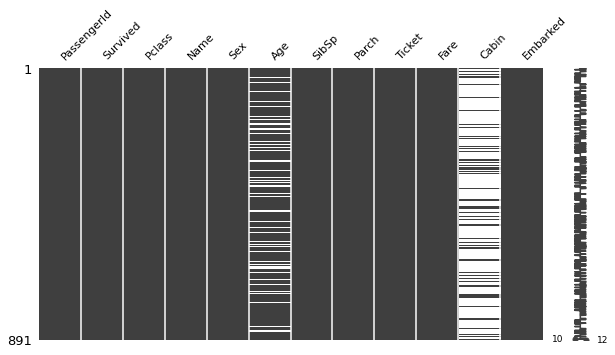

In [3]:
import missingno as msno
msno.matrix(df, figsize=(10,5), fontsize=11)

In [4]:
# combine two or more filter conditions

missing_age = df["Age"].isnull()
missing_cabin = df["Cabin"].isnull()
unknown_age_and_cabin = df[missing_age & missing_cabin].copy()

#### Option 1  
drop the missing data

In [5]:
clean_dataset = df.dropna(subset=["Embarked"]).copy()
clean_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Option 2  
impute the missing data with mean


In [6]:
# calculate the mean of numerical data only for those where the Age>0
# cause there may be the null values which are recorded as the 0
# these 0 valued records will effect the mean of the data

mean_age = clean_dataset[clean_dataset.Age>0]['Age'].mean()
clean_dataset["Age"] = clean_dataset["Age"].fillna(mean_age).replace({0:mean_age})

#### Option 3  
Assign a new category to unknown categorical data

In [7]:
# Assign unknow to records where "Cabin" is empty
clean_dataset["Cabin"] = clean_dataset["Cabin"].fillna("Unknown")

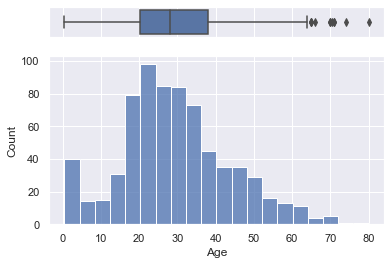

In [12]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
# df = sns.load_dataset("iris")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(x=df["Age"], ax=ax_box)
sns.histplot(data=df,x="Age", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

In [15]:
import plotly.express as px
fig = px.histogram(df, x="Age", y="Survived", histfunc='avg', marginal = 'box')
fig.show()

In [18]:
fig = px.histogram(df, x="Pclass", y="Survived", histfunc='avg',color="Parch")
fig.update_layout(barmode='group')
fig.show()

In [30]:
fig = px.box(data_frame=clean_dataset,x="Pclass",y="SibSp")
fig.show()

In [32]:
fig = px.scatter(data_frame=clean_dataset,x="Age",y="Fare")
fig.show()

In [28]:
clean_dataset['total']=1
fig = px.sunburst(clean_dataset, path=['Pclass','Sex','Survived','Embarked'], values='total')
fig.show()